# Лабораторная работа №3

**Выполнена студентом группы А-05-20 Ходосевичем Леонидом**  
**Вариант 25**

In [20]:
import numpy as np
import matplotlib.pyplot as plt

N = 25
K = 0

# Задача 3.1.  
Реализовать решение СЛАУ с помощью LU разложения и LU разложения по схеме частичного выбора.   
Решить систему небольшой размерности с возмущенной матрицей обоими методами,   
оценить погрешность и сравнить с теоретической оценкой.   
Проанализировать поведение  методов с ростом числа уравнений.  

In [2]:
print((N+K) % 2)
print((N+K) % 4)

1
1


Решение с помощью LU модифицирует исходную матрицу А;   
Решение с помощью LU по схеме частичного выбора реализовано в виде двух функций, одна из которых возвращает две матрицы – L и U, не модифицируя A, а вторая функция решает систему.  
  
$ A_{ij} = \frac{1}{70 - 3i - j}$

Создаем матрицу L, а так же реализуем функции для создания матриц А(с погрешностью и без) и вектора b

In [3]:
def create_matrix_with_error(n_1):
    A_1 = np.zeros((n_1,n_1))
    for i in range(n_1):
        for j in range(n_1):
            A_1[i][j] = 1 / (70 - 3*i - j)
    A_1[0][0] += 0.001
    return A_1

def create_matrix_without_error(n_2):
    A_2 = np.zeros((n_2,n_2))
    for i in range(n_2):
        for j in range(n_2):
            A_2[i][j] = 1 / (70 - 3*i - j)
    return A_2

def create_vector(n_b):
    x_for_b = [N for i in range(n_b)]
    A_for_b = create_matrix_without_error(n_b)
    x_for_b = np.asarray(x_for_b)
    b_result = np.dot(A_for_b,x_for_b)
    return(b_result)

In [4]:
from LU import lu_decomposion 

In [5]:
first_without_error = lu_decomposion(create_matrix_without_error(5))
first_without_error.fit(partial_pivoting=False, change_origin=True)
first_without_error.solve(create_vector(5))

matrix([[24.99960815],
        [25.00147095],
        [24.99793146],
        [25.00129147],
        [24.99969797]])

Как видим метод без погрешности сошелся

In [6]:
np.linalg.solve(create_matrix_without_error(5), create_vector(5))

array([25.00023964, 24.99910044, 25.00126495, 24.99921028, 25.00018468])

In [7]:
first_without_error = lu_decomposion(create_matrix_with_error(5))
first_without_error.fit(partial_pivoting=False, change_origin=True)
first_without_error.solve(create_vector(5))

matrix([[ 5.29356330e-08],
        [ 1.18734184e+02],
        [-1.06650883e+02],
        [ 1.07089563e+02],
        [ 5.82709608e+00]])

Как видим метод с погрешностью сошелся со встроенной функцией, но ответ не верный, это объясняется  
плохой обусловленностью матрицы А, это показано в подпункте 2

In [8]:
np.linalg.solve(create_matrix_with_error(5), create_vector(5))

array([ 5.29373391e-08,  1.18734179e+02, -1.06650869e+02,  1.07089550e+02,
        5.82710024e+00])

# подпункт 2
Решение с помощью LU по схеме частичного выбора реализовано в виде двух функций, одна из которых возвращает две матрицы – L и U, не модифицируя A, а вторая функция решает систему.

In [9]:
second_without_error = lu_decomposion(create_matrix_without_error(5))
second_without_error.fit(partial_pivoting=True, change_origin=False)
second_without_error.solve(create_vector(5))

matrix([[24.99953776, 25.00173653, 24.99755609, 25.00152706, 24.99964257]])

In [10]:
np.linalg.solve(create_matrix_without_error(5),create_vector(5))

array([25.00023964, 24.99910044, 25.00126495, 24.99921028, 25.00018468])

In [11]:
second_with_error = lu_decomposion(create_matrix_with_error(5))
second_with_error.fit(partial_pivoting=True, change_origin=False)
second_with_error.solve(create_vector(5))

matrix([[ 5.29361049e-08,  1.18734184e+02, -1.06650882e+02,
          1.07089563e+02,  5.82709622e+00]])

In [12]:
np.linalg.solve(create_matrix_with_error(5),create_vector(5))

array([ 5.29373391e-08,  1.18734179e+02, -1.06650869e+02,  1.07089550e+02,
        5.82710024e+00])

In [13]:
print(second_without_error.origin_matrix)
print(np.dot(np.dot(second_without_error.lu[0], second_without_error.lu[1]),second_without_error.lu[2]))

[[0.01428571 0.01449275 0.01470588 0.01492537 0.01515152]
 [0.01492537 0.01515152 0.01538462 0.015625   0.01587302]
 [0.015625   0.01587302 0.01612903 0.01639344 0.01666667]
 [0.01639344 0.01666667 0.01694915 0.01724138 0.01754386]
 [0.01724138 0.01754386 0.01785714 0.01818182 0.01851852]]
[[0.01428571 0.01449275 0.01470588 0.01492537 0.01515152]
 [0.01492537 0.01515152 0.01538462 0.015625   0.01587302]
 [0.015625   0.01587302 0.01612903 0.01639344 0.01666667]
 [0.01639344 0.01666667 0.01694915 0.01724138 0.01754386]
 [0.01724138 0.01754386 0.01785714 0.01818182 0.01851852]]


In [14]:
second_without_error.origin_matrix

array([[0.01428571, 0.01449275, 0.01470588, 0.01492537, 0.01515152],
       [0.01492537, 0.01515152, 0.01538462, 0.015625  , 0.01587302],
       [0.015625  , 0.01587302, 0.01612903, 0.01639344, 0.01666667],
       [0.01639344, 0.01666667, 0.01694915, 0.01724138, 0.01754386],
       [0.01724138, 0.01754386, 0.01785714, 0.01818182, 0.01851852]])

Функция подсчета абсолютной погрешности решения

In [15]:
def absolute_error(vector):
    accurate = [N for i in range(vector.shape[0])]
    return abs(accurate - vector.reshape([1,-1])).max()

second_with_error.solve(create_vector(5)).reshape([1,-1])

matrix([[ 5.29361049e-08,  1.18734184e+02, -1.06650882e+02,
          1.07089563e+02,  5.82709622e+00]])

Тут считается число обусловленности матрицы А  
Как видим оно огромно, следовательно имеет место катастрафическая потеря точности  
Последняя строка демонстрирует выполнение теоретической оценки точности  


In [16]:
matrix_for_errors_1 = create_matrix_without_error(5) 
matrix_for_errors_2 = create_matrix_with_error(5)

nu_delta = np.linalg.norm(matrix_for_errors_1, np.inf) * np.linalg.norm(np.linalg.inv(matrix_for_errors_1), np.inf)

matrix_relational_error = np.linalg.norm(matrix_for_errors_1 - matrix_for_errors_2,np.inf) / \
    np.linalg.norm(matrix_for_errors_1,np.inf)

accurate_for_errors = [N for i in range(5)]
vector_relational_error = np.linalg.norm(accurate_for_errors - second_with_error.solution, np.inf) / \
    np.linalg.norm(accurate_for_errors, np.inf)

print('Число обусловленности:', nu_delta)
print('Относительная погрешность А:', matrix_relational_error)
print('Относительная погрешность b:', vector_relational_error)
print(absolute_error(second_with_error.solution) / max(accurate_for_errors) <= \
      nu_delta*(matrix_relational_error + vector_relational_error))

Число обусловленности: 2490880987676.6104
Относительная погрешность А: 0.011192853951610076
Относительная погрешность b: 14.065901297930004
True


Далее строятся графики погрешностей для обоих методов при $5\le n \le 15$

In [25]:
abs_error_list_1 = []
abs_error_list_2 = []
abs_error_linalg = []
for i in range(5,16,1):
    #1
    model_for_plot_1 = lu_decomposion(create_matrix_without_error(i))
    model_for_plot_1.fit(partial_pivoting=False, change_origin=True)
    abs_error_list_1.append(absolute_error(model_for_plot_1.solve(create_vector(i))))
    #2
    model_for_plot_2 = lu_decomposion(create_matrix_without_error(i))
    model_for_plot_2.fit(partial_pivoting=True, change_origin=False)
    abs_error_list_2.append(absolute_error(model_for_plot_2.solve(create_vector(i))))
    #3
    abs_error_linalg.append(absolute_error(np.linalg.solve(create_matrix_without_error(i), create_vector(i))))
    
    

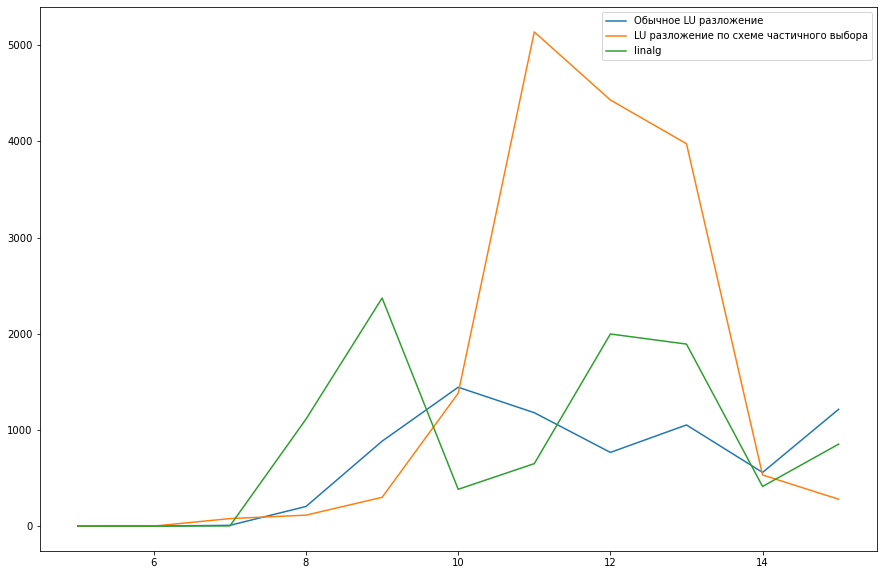

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.plot([i for i in range(5,16,1)],abs_error_list_1,label = "Обычное LU разложение")
ax.plot([i for i in range(5,16,1)],abs_error_list_2,label = "LU разложение по схеме частичного выбора")
ax.plot([i for i in range(5,16,1)],abs_error_linalg,label = "linalg")
ax.legend()

Как видим, оба метода при данной матрице дают очень искаженные результаты, вследствие плохой обусловленности матрицы.

# Задача 3.2

на  главной диагонали элементы равны  120, на 6-ой  поддиагонали и на 16-ой поддиагонали элементы равны 24.
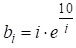
n = 45


Создаем матрицу А и вектор b

In [27]:
n = 45
A_3_2 = np.zeros((n,n))
b_3_2 = np.zeros((n,1))
for i in range(n):
    if ((i+6)>=0) & ((i+6) <= n-1):
        A_3_2[i+6][i] = 24
    if ((i+16)>=0) & ((i+16) <= n-1):
        A_3_2[i][i+16] = 24
    A_3_2[i,i] = 120
    
    b_3_2[i] = (i+1)*np.e**(10/(i+1))

In [36]:
print(A_3_2)
print(b_3_2.T)

[[120.   0.   0. ...   0.   0.   0.]
 [  0. 120.   0. ...   0.   0.   0.]
 [  0.   0. 120. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 120.   0.   0.]
 [  0.   0.   0. ...   0. 120.   0.]
 [  0.   0.   0. ...   0.   0. 120.]]
[[22026.46579481   296.82631821    84.09487468    48.72997584
     36.94528049    31.7669403     29.20913719    27.92274366
     27.339586      27.18281828    27.30271593    27.61171069
     28.05537194    28.59817898    29.21601062    29.89193532
     30.61373113    31.37236198    32.16100741    32.97442541
     33.80852244    34.66005627    35.52642638    36.40552311
     37.29561744    38.19527904    39.10331462    40.01872091
     40.94064833    41.86837275    42.80127319    43.73881412
     44.68053126    45.62602018    46.57492691    47.52694038
     48.48178609    49.4392209     50.39902867    51.36101667
     52.32501242    53.29086118    54.25842366    55.2275742
     56.19819911]]


Определим функцию метода решения данной системы

In [37]:
def Solve_3_2(A_, b_):
    x = np.zeros((n,1))
    A = np.copy(A_)
    b = np.copy(b_)
    for i in range(n):
        if (i-6) < 0 :
            x[i] = b[i] / A[i,i]
        elif (i-15) < 0:
            x[i] = b[i] / A[i,i] - A[i,i-6] / A[i,i] * x[i-6]
        else:
            x[i] = b[i] / A[i,i] - A[i,i-6] / A[i,i] * x[i-6] - A[i,i-16] / A[i,i] * x[i-16]
    return x

In [38]:
Solve_3_2(A_3_2,b_3_2).T 

array([[ 1.83553882e+02,  2.47355265e+00,  7.00790622e-01,
         4.06083132e-01,  3.07877337e-01,  2.64724503e-01,
        -3.64673668e+01, -2.62021000e-01,  8.76717588e-02,
         1.45306859e-01,  1.65947165e-01,  1.77152689e-01,
         7.52726814e+00,  2.90722358e-01,  2.25932403e-01,
         2.20038089e-01,  2.21924993e-01,  2.26005812e-01,
        -1.23744523e+00,  2.16642407e-01,  2.36551206e-01,
         2.44826184e-01,  2.51668555e-01,  2.58178197e-01,
         5.58285858e-01,  2.74965511e-01,  2.78550714e-01,
         2.84524104e-01,  2.90838359e-01,  2.97267467e-01,
         2.45020105e-01,  3.09497016e-01,  3.16627618e-01,
         3.23312014e-01,  3.29956719e-01,  3.36604343e-01,
         3.55010863e-01,  3.50094104e-01,  3.56666382e-01,
         3.63346069e-01,  3.70050426e-01,  3.76769641e-01,
         3.81151358e-01,  3.90210964e-01,  3.96985049e-01]])

In [39]:
np.linalg.solve(A_3_2,b_3_2).T

array([[ 1.83521215e+02,  2.44037124e+00,  9.60489871e-01,
         3.73912117e-01,  2.73822105e-01,  2.27366920e-01,
        -3.64993451e+01, -2.94996923e-01, -6.36735672e-02,
         1.09606490e-01,  1.29662724e-01,  1.41026866e-01,
         7.48903129e+00,  2.35459363e-01,  2.04747109e-01,
         1.62707054e-01,  1.63333427e-01,  1.65907078e-01,
        -1.29849624e+00,  1.60855075e-01,  1.70276160e-01,
         1.86787912e-01,  1.92558178e-01,  1.98061029e-01,
         4.97027382e-01,  2.10672861e-01,  2.15477438e-01,
         2.17986697e-01,  2.23162507e-01,  3.09290900e-01,
         2.57271800e-01,  3.22355545e-01,  3.29242273e-01,
         3.36619495e-01,  3.43491890e-01,  3.34199656e-01,
         3.52560524e-01,  3.47522398e-01,  3.54143451e-01,
         3.60684573e-01,  3.67343392e-01,  3.77250579e-01,
         3.81641426e-01,  3.90725305e-01,  3.97489636e-01]])

Сравнивая результаты убеждаемся, что функция определена правильно

# Задача 3.3

Решить задачу итерационным методом. указанным в  индивидуальном варианте . Вектор правой части задается  как  , где  .

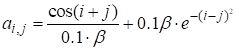
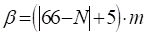
m = 26  
Метод минимальных невязок

Определяем все нужные константы, матрицу А и вектор b

In [ ]:
m = 26
N = 25
betta = (abs(66 - N) + 5) * m
A_3_3 = np.zeros((m,m))
for i in range(m):
    for j in range(m):
        A_3_3[i,j] = np.cos(i+j) / (0.1 * betta) + 0.1 * betta * np.e**(-(i - j)**2)

x_for_b_3 = [N for i in range(m)]
x_for_b_3 = np.asarray(x_for_b_3)
B_3_3 = np.dot(A_3_3,x_for_b_3)

Определяем функцию для данного метода

In [ ]:
def Method_of_minimal_residual(Matrix, B, eps):
    x = np.zeros(B.shape[0])
    r = np.dot(Matrix,x) - B
    r0 = r
    tau = (np.dot(np.dot(Matrix,r),r)) / (np.dot(np.dot(Matrix,r),np.dot(Matrix,r)))
    x = x - tau*r
    while (np.linalg.norm(r,np.inf)) / (np.linalg.norm(r0,np.inf)) > eps:
        r = np.dot(Matrix,x) - B
        tau = (np.dot(np.dot(Matrix,r),r)) / (np.dot(np.dot(Matrix,r),np.dot(Matrix,r)))
        x = x - tau*r
    return x

Сравниваем результат со встроенной функцией, уменьшаем невязку в 10000000 раз

In [ ]:
print(Method_of_minimal_residual(A_3_3,B_3_3,1/10000000))
print(np.linalg.solve(A_3_3,B_3_3))

Получили ответ очень близкий к точному решению. Если вязть еще большее число в которое мы уменьшаем невязку, о получим точное значение

In [ ]:
print(Method_of_minimal_residual(A_3_3,B_3_3,1/100000000000))
print(np.linalg.solve(A_3_3,B_3_3))